Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

In [2]:
np.random.seed(0)

*Read Data*

In [3]:
data = pd.read_csv("data/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### VTODO: 1. Check the distribution [Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)] of target label 'fetal_health' using a SNS Countplot

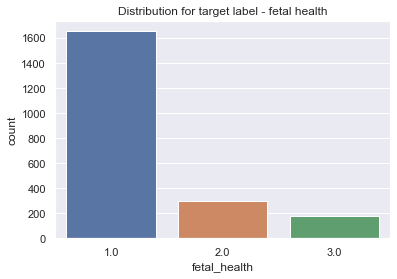

In [4]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="fetal_health", data=data).set(title='Distribution for target label - fetal health')

### TODO: 2. Find the top 3 input features based on the correlation matrix by plotting a SNS heatmap.



The top 3 features are - 
['prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']


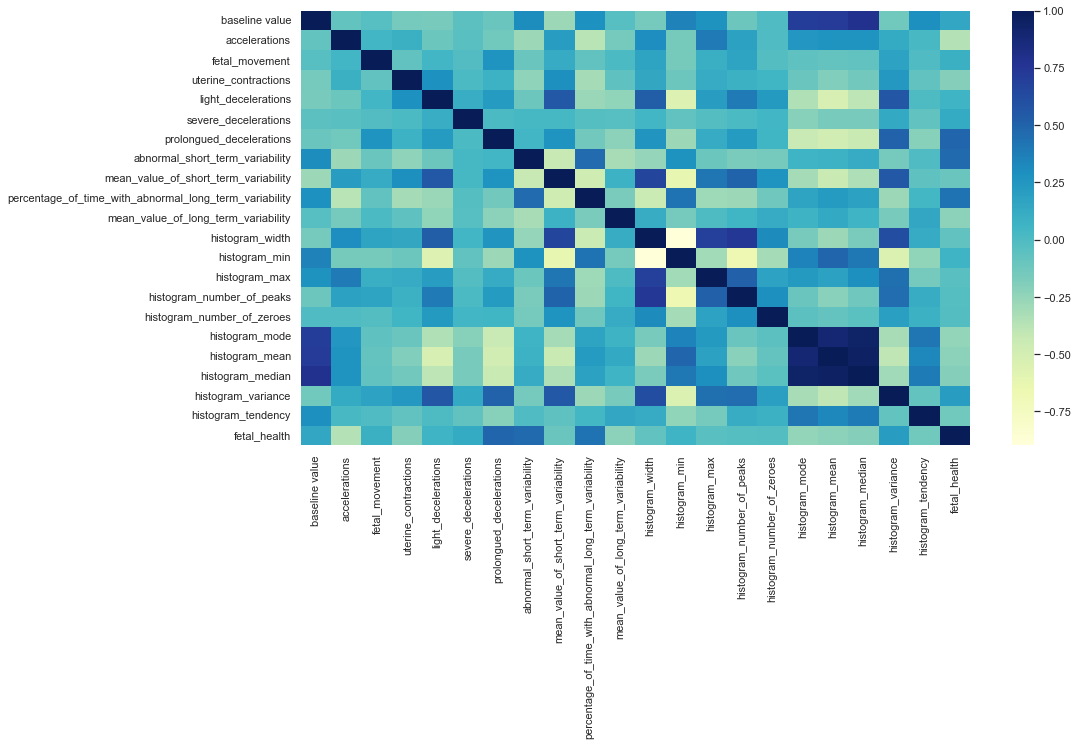

In [5]:
corr = data.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="YlGnBu");

#The three features are - 

print("The top 3 features are - ")
print(["prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability"])

In [6]:
X = data.drop(['fetal_health'], axis=1)
y = data["fetal_health"]

train_size, num_features = X.shape
num_labels = 3

### TODO: 3. Use Scikit-Learn Standard Scaler to normalize the input features.



In [7]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [8]:
# Split the dataset into a training set (80%) and a test set (20%) using train_test_split() from sklearn library.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
print("Train data shape = ", X_train.shape, y_train.shape)
print("Test data shape = ", X_test.shape, y_test.shape)

Train data shape =  (1700, 21) (1700,)
Test data shape =  (426, 21) (426,)


### Scikit-Learn's SVM Model 

SVM AND LINEAR MODEL WITH VARIABLE C VALUE

**1) Prediction using c= 1**

In [10]:
model = svm.SVC(C=1, kernel='linear', probability=True, random_state=0)
classifier = model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


Confusion Matrix -
 [[316  15   2]
 [ 23  34   7]
 [  2   5  22]]


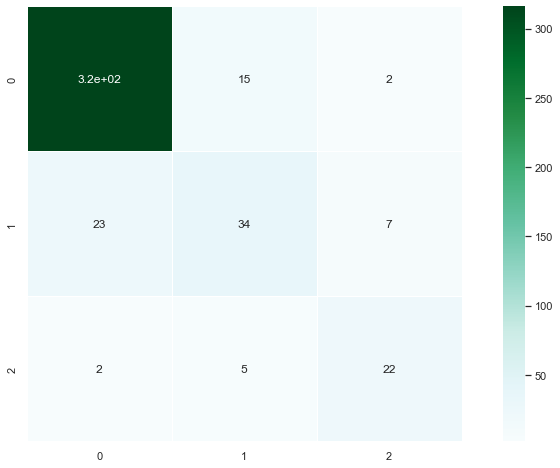

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="BuGn")
print("Confusion Matrix -\n", cm)

In [12]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

res = pd.DataFrame([['SVM : C=1 AND DEGREE = 1', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM : C=1 AND DEGREE = 1,0.873239,0.873239,0.746273,0.749097


**2) Prediction using c= 100**

In [13]:
C=100
model = svm.SVC(C=C, kernel='linear', probability=True, random_state=0)
classifier = model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix -
 [[314  16   3]
 [ 21  37   6]
 [  2   5  22]]


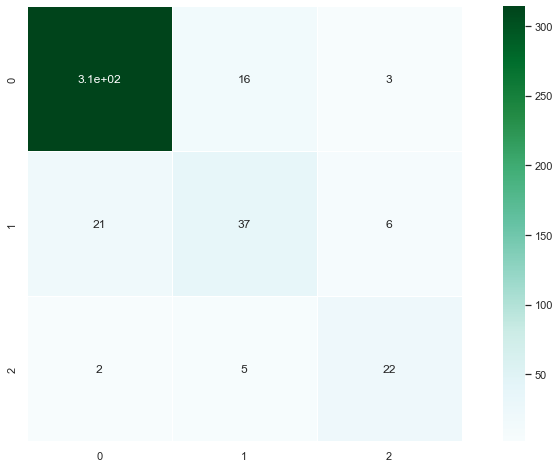

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="BuGn")
print("Confusion Matrix -\n", cm)

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

res = pd.DataFrame([['SVM : C=100 AND DEGREE = 1', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM : C=100 AND DEGREE = 1,0.875587,0.875587,0.759896,0.759068


**3) Prediction using c= 0.2**

In [16]:
C = 0.2
model = svm.SVC(C=C, kernel='linear', probability=True, random_state=0)
classifier = model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix -
 [[317  14   2]
 [ 25  37   2]
 [  3   4  22]]


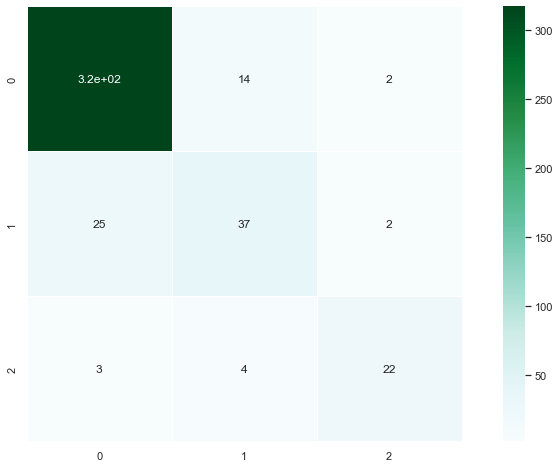

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="BuGn")
print("Confusion Matrix -\n", cm)

In [18]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

res = pd.DataFrame([['SVM : C=0.2 AND DEGREE = 1', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM : C=0.2 AND DEGREE = 1,0.882629,0.882629,0.762899,0.785651


using polynomial kernel SVC MODEL

**1) Prediction using c= 1(Ploynomial Kernel), degree  = 4**

In [19]:
model = svm.SVC(C=1, kernel='poly', probability=True, random_state=0,degree = 4)
classifier = model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


Confusion Matrix -
 [[313  10  10]
 [ 27  32   5]
 [  4   5  20]]


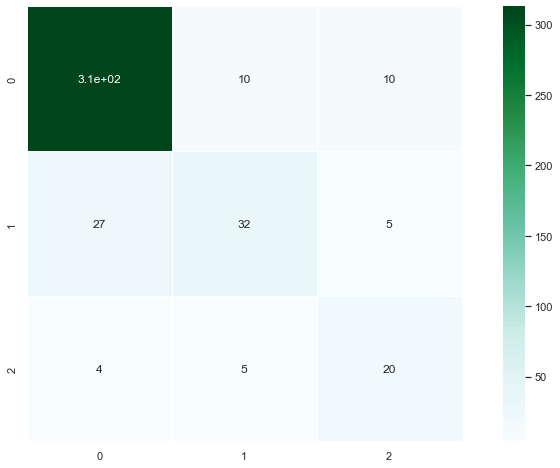

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="BuGn")
print("Confusion Matrix -\n", cm)

In [21]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

res = pd.DataFrame([['SVM : C=1 AND DEGREE = 1', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM : C=1 AND DEGREE = 1,0.856808,0.856808,0.709865,0.708748


**2) Prediction using c= 100 (Ploynomial Kernel), degree  = 4**

In [22]:
C=100
model = svm.SVC(C=C, kernel='poly', probability=True, random_state=0,degree = 4)
classifier = model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix -
 [[317  15   1]
 [ 19  45   0]
 [  4   4  21]]


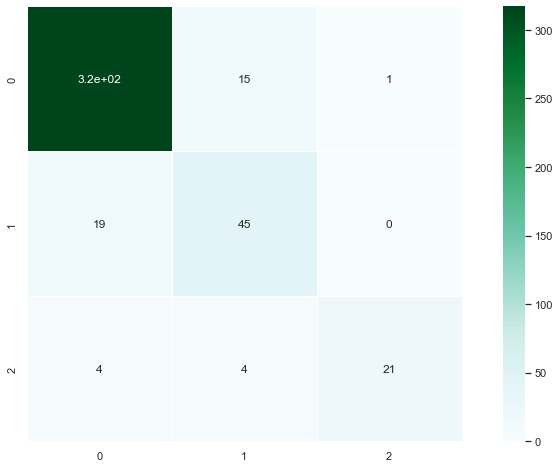

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="BuGn")
print("Confusion Matrix -\n", cm)

In [24]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

res = pd.DataFrame([['SVM : C=100 AND DEGREE = 1', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM : C=100 AND DEGREE = 1,0.899061,0.899061,0.793072,0.822902


**3) Prediction using c= 0.2 (Ploynomial Kernel), degree  = 4**

In [25]:
C = 0.2
model = svm.SVC(C=C, kernel='poly', probability=True, random_state=0, degree = 4)
classifier = model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix -
 [[319   8   6]
 [ 33  28   3]
 [  4   6  19]]


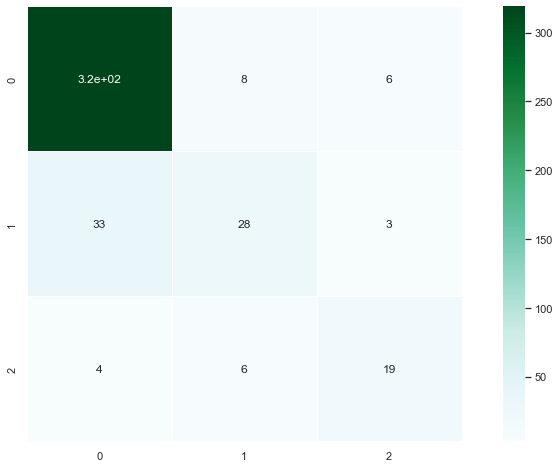

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="BuGn")
print("Confusion Matrix -\n", cm)

In [27]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

res = pd.DataFrame([['SVM : C=0.2 AND DEGREE = 1', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM : C=0.2 AND DEGREE = 1,0.859155,0.859155,0.683543,0.706983


###PLOTS

In [29]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==2)]
    star = X[np.argwhere(y==3)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.scatter([s[0][0] for s in star],
                   [s[0][1] for s in star],
                   s = 25,
                   color = 'yellow',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    pyplot.title("Dataset Features")
    pyplot.legend(['label 2','label 1','label 0'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.show()

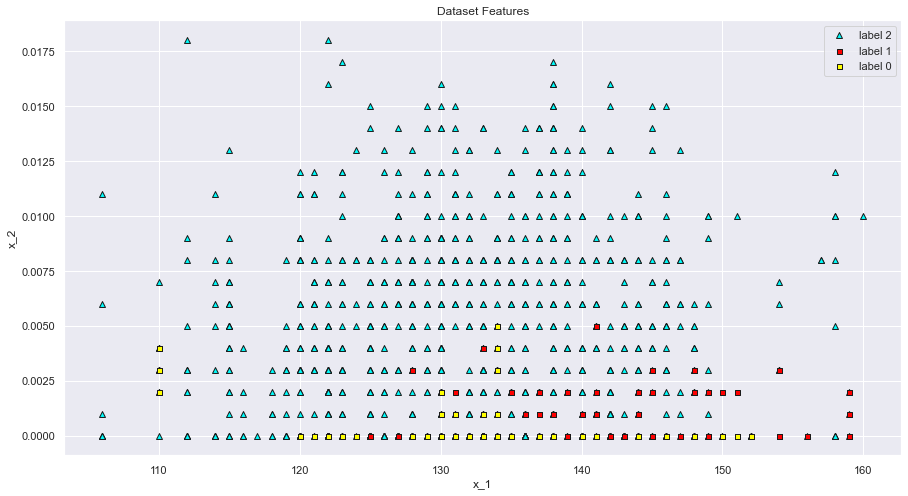

In [30]:
plot_points(X_train, y_train)

Test Features


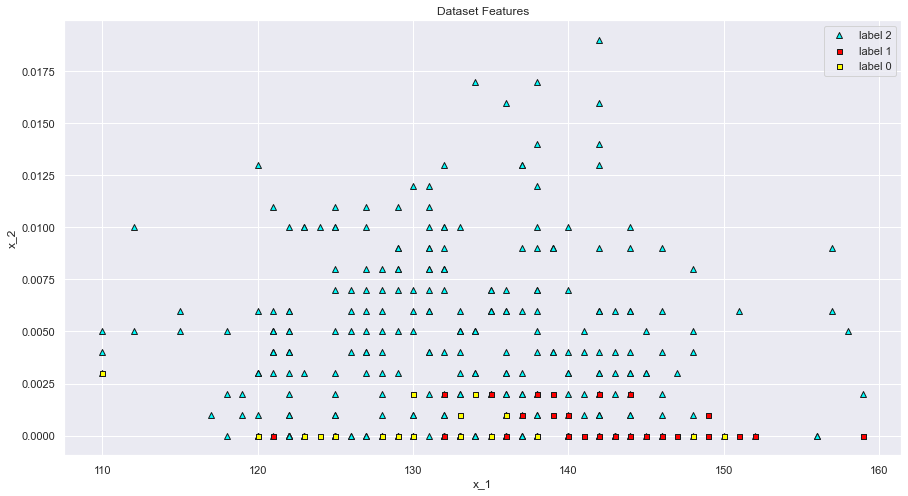

In [31]:
print("Test Features")
plot_points(X_test, y_test)

# Decision Boundary Plots

In [66]:
columns = ["prolongued_decelerations","abnormal_short_term_variability"]
df_sliced = pd.DataFrame(data,columns = columns)
X = df_sliced.to_numpy()
y = data["fetal_health"]

In [69]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
linear_svc = svm.SVC(kernel='linear', C=200).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=4, C=50).fit(X, y)
lin_svc = svm.LinearSVC(C=10).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel C = 1',
          'SVC with linear kernel C = 200',
          'SVC with polynomial (degree 4) kernel',
         'SVC with LinearSVC kernel',]



/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


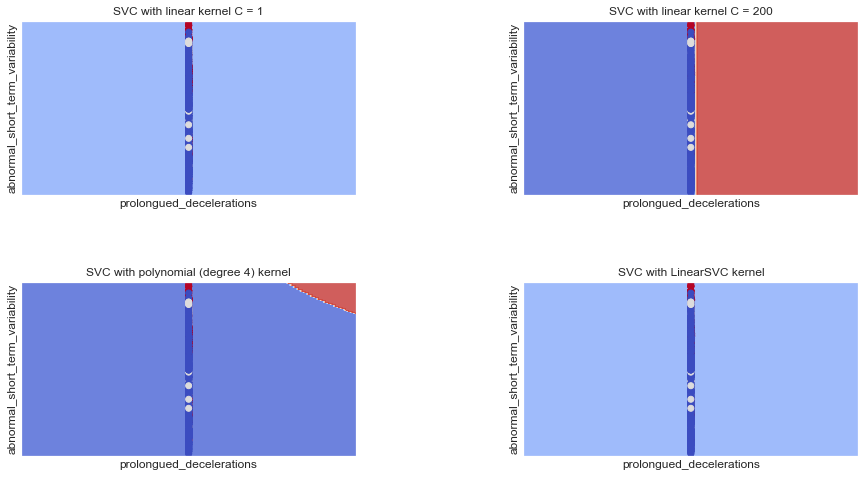

In [70]:
for i, clf in enumerate((svc, linear_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('prolongued_decelerations')
    plt.ylabel('abnormal_short_term_variability')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [28]:
#tried making decision boundary using the top two features for both polynomial and linear kernel svm